In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
import pandas as pd

cmap = plt.cm.viridis


In [2]:
diabetes = load_diabetes() # Loading the Diabetes dataset

In [3]:
X = diabetes.data[:, [2]] #For our samples, we only want the third column (BMI) from our dataset
y = diabetes.target #The Scikit-learn library already defines the target data (Diabetes progression)
scaler = StandardScaler() #We should scale our X data first
X_scaled = scaler.fit_transform(X) #This subtracts the mean and scales to unit variance.


Text(0, 0.5, 'Diabetes Progression')

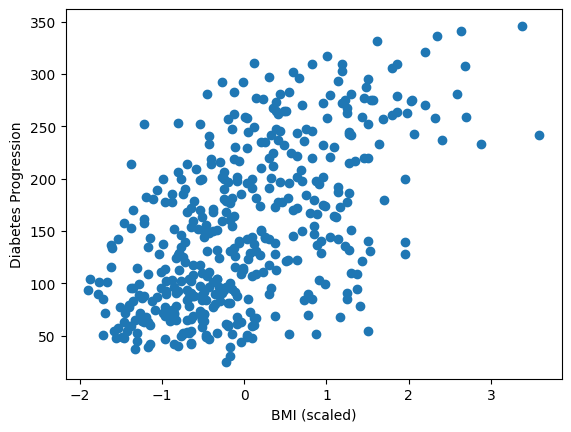

In [4]:
#Plot the data for inspection
plt.scatter(X_scaled,y)
plt.xlabel("BMI (scaled)")
plt.ylabel("Diabetes Progression")

# Gradient Descent Algorithm

Iteration 0: Loss=28647.8816, m=5.0803, c=0.3043
Iteration 100: Loss=20479.2092, m=12.3521, c=27.8511
Iteration 200: Loss=15005.7770, m=18.3046, c=50.4001
Iteration 300: Loss=11338.2950, m=23.1770, c=68.8579
Iteration 400: Loss=8880.8927, m=27.1655, c=83.9668
Iteration 500: Loss=7234.3064, m=30.4303, c=96.3345
Iteration 600: Loss=6131.0085, m=33.1028, c=106.4583
Iteration 700: Loss=5391.7420, m=35.2903, c=114.7453
Iteration 800: Loss=4896.3953, m=37.0810, c=121.5288
Iteration 900: Loss=4564.4875, m=38.5468, c=127.0815
Iteration 1000: Loss=4342.0921, m=39.7467, c=131.6267
Iteration 1100: Loss=4193.0757, m=40.7288, c=135.3473
Iteration 1200: Loss=4093.2270, m=41.5328, c=138.3929
Iteration 1300: Loss=4026.3232, m=42.1909, c=140.8859
Iteration 1400: Loss=3981.4942, m=42.7296, c=142.9266
Iteration 1500: Loss=3951.4565, m=43.1706, c=144.5970
Iteration 1600: Loss=3931.3297, m=43.5315, c=145.9644
Iteration 1700: Loss=3917.8437, m=43.8270, c=147.0837
Iteration 1800: Loss=3908.8073, m=44.0688, c

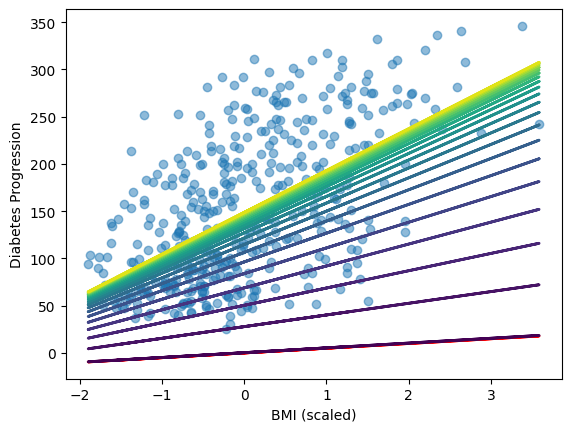

In [ ]:
m, c = 5, 0 #Initial guess
learning_rate = 0.001 # Learning rate or step size we want to use
iterations = 2000 #How many attempts do you want to try?

norm = matplotlib.colors.Normalize(vmin=0, vmax=iterations) #This creates a colour scale for plotting purposes - each iteration gets it own colour

loss_history = [] # An empty array so we can record our loss scores
iteration_history = [] # An empty array to record our iteration number
plt.scatter(X_scaled, y, alpha=0.5, label="Observations") # Let's plot our data
plt.plot(X_scaled, m * X_scaled.flatten() + c, color='red', 
                 linewidth=2, label=f"Start") # Plotting our initial guess

for i in range(iterations): #Loop through our iterations 
    y_pred = m * X_scaled.flatten() + c #Our guess each step
    error = y_pred - y #Difference between our model prediction and the actual data per data point

    loss = np.mean(error ** 2) #Our loss metric is the Mean Squared Error
    loss_history.append(loss) #Update our loss history
    iteration_history.append(i) #Update out itertation history
    dm = (2 / len(X_scaled)) * np.dot(error, X_scaled.flatten()) #The partial derivative of the gradient
    dc = (2 / len(X_scaled)) * np.sum(error) #The partial derivative of the intercept
    m -= learning_rate * dm #Multiple our partial derivative by the step size 
    c -= learning_rate * dc #Multiple our partial derivative by the step size

    if i % 100 == 0: # Let's print our results every N steps
        print(f"Iteration {i}: Loss={loss:.4f}, m={m:.4f}, c={c:.4f}")
        
        plt.plot(X_scaled, m * X_scaled.flatten() + c, color=cmap(norm(i)),
                 linewidth=2, label=f"Iteration {i}") # plot our result every N steps
        
plt.xlabel("BMI (scaled)")
plt.ylabel("Diabetes Progression")
print("\nFinal parameters:")
print(f"Slope (m): {m:.4f}, Intercept (c): {c:.4f}")



Text(0.5, 0, 'Iteration Number')

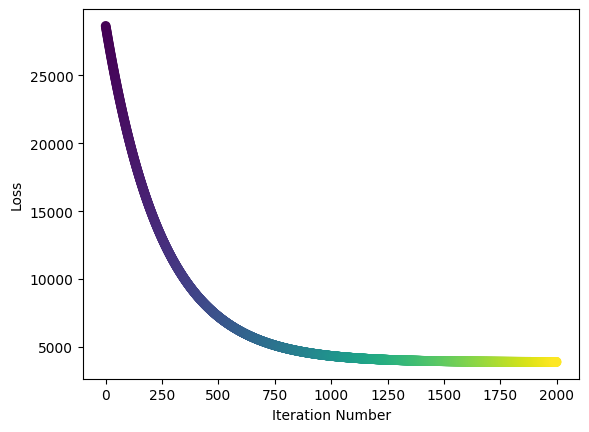

In [6]:
plt.scatter(iteration_history, loss_history,color=cmap(norm(iteration_history)) )
plt.ylabel('Loss')
plt.xlabel('Iteration Number')